EMPLOYEE TURN OVER ANALYTICS

In [ ]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")




In [ ]:
data=pd.read_excel('1673873196_hr_comma_sep.xlsx')

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
#renaming certain columns for better readability
data=data.rename(columns={'satisfaction_level':'satisfaction',
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })


In [ ]:
data.isnull().sum()#checking for missing values

satisfaction           0
evaluation             0
projectCount           0
averageMonthlyHours    0
yearsAtCompany         0
workAccident           0
turnover               0
promotion              0
department             0
salary                 0
dtype: int64

In [ ]:
data.dtypes

satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
turnover                 int64
promotion                int64
department              object
salary                  object
dtype: object

Understanding what factors contributed most to employee turnover by EDA


In [ ]:
# Display the statistical overview of the employees
round(data.describe(), 2) #rounding off the values upto 2 decimal points

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [ ]:
# Display the mean summary of Employees (Turnover V.S. Non-turnover).
turnover_Summary = data.groupby('turnover') #  0 are those who did not leave the company  and vice versa for 1
round(turnover_Summary.mean(),2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [ ]:
# Display the standard deviation summary of Employees (Turnover V.S. Non-turnover).
turnover_Summary = data.groupby('turnover')#  0 are those who did not leave the company  and vice versa for 1
round(turnover_Summary.std(),2)

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.22,0.16,0.98,45.68,1.56,0.38,0.16
1,0.26,0.20,1.82,61.20,0.98,0.21,0.07


In [ ]:
#defining correlation of the data frame
data.corr()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion
satisfaction,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
projectCount,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
averageMonthlyHours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
yearsAtCompany,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
workAccident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
turnover,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [ ]:
#import libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt


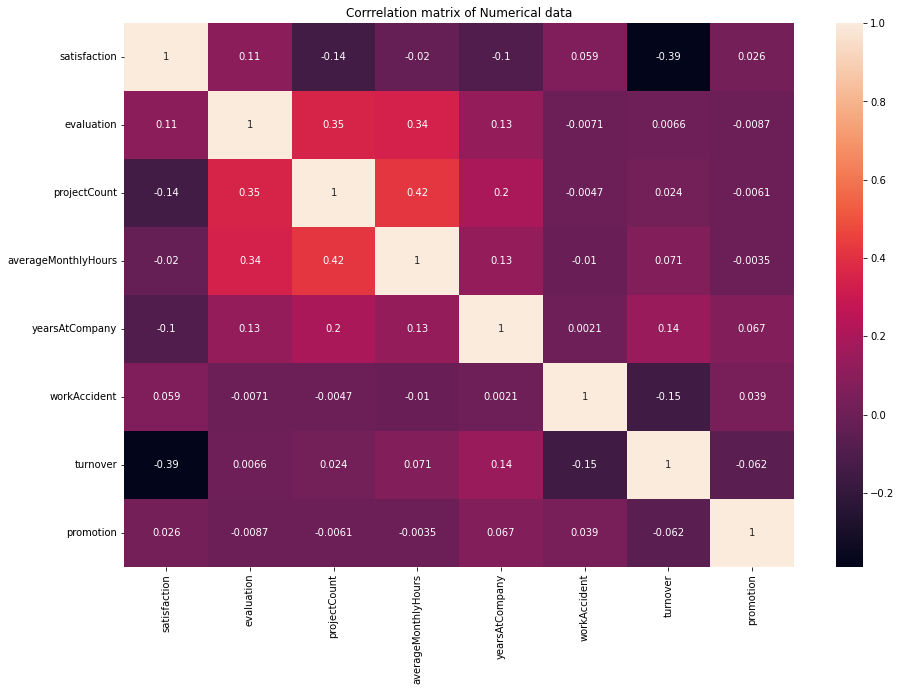

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.title("Corrrelation matrix of Numerical data")
plt.show()

Distribution of Satisfaction, Evaluation, and Monthly Hours

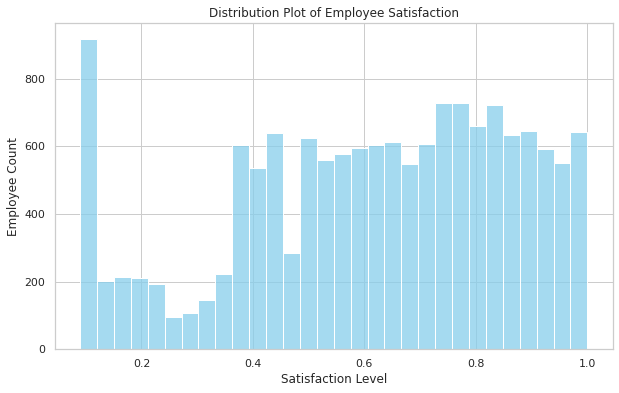

In [ ]:
#distribution  plot for Employee satisaction without kde(kernel density Estimate
#  'satisfaction' is the column in my DataFrame representing employee satisfaction
sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(10, 6))  # Optional: Set the size of the plot

sns.histplot(data['satisfaction'], kde=False, bins=30, color='skyblue')
plt.title('Distribution Plot of Employee Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Employee Count')

plt.show()


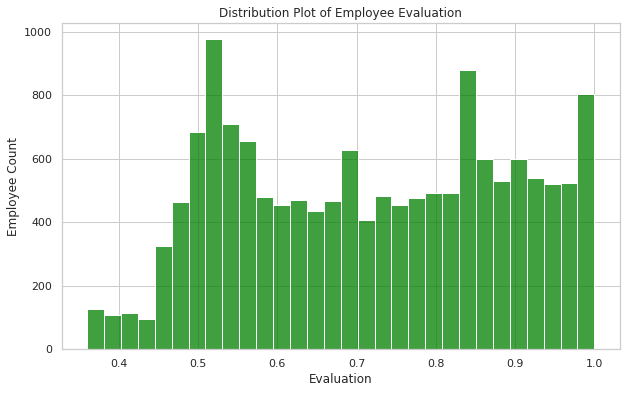

In [ ]:
#  Distribution plot for employee evaluation
sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(10, 6))  # Optional: Set the size of the plot

sns.histplot(data['evaluation'], kde=False, bins=30, color='green')
plt.title('Distribution Plot of Employee Evaluation')
plt.xlabel('Evaluation')
plt.ylabel('Employee Count')

plt.show()


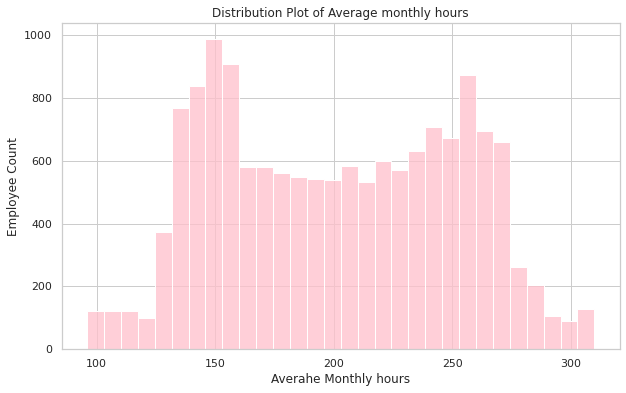

In [ ]:
#  Distribution plot for average monthly hours without kde
sns.set(style="whitegrid")  # Optional: Set the style of the plot

plt.figure(figsize=(10, 6))  # Optional: Set the size of the plot

sns.histplot(data['averageMonthlyHours'], kde=False, bins=30, color='pink')
plt.title('Distribution Plot of Average monthly hours')
plt.xlabel('Averahe Monthly hours')
plt.ylabel('Employee Count')

plt.show()


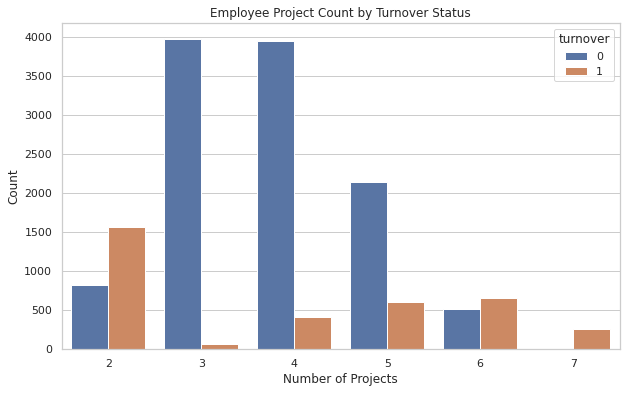

In [ ]:
#bar plot of Employee Project Count of both employees who left and who stayed in the organization
plt.figure(figsize=(10, 6))
sns.countplot(x='projectCount', hue='turnover', data=data)
plt.title('Employee Project Count by Turnover Status')
plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.show()


More than half of the employees with 2,6and 5projects left the company
Majority of the employees who did not leave the company had 3,4, and 5 projects
All of the employees with 7 projects left the company
There is an increase in employee turnover rate as project count increases

 Perform clustering of Employees who left based on their satisfaction , evaluation
    

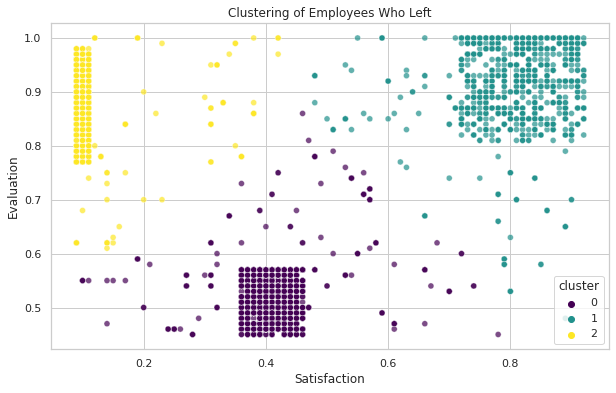

In [ ]:
#clustering by k-means algorithm

from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame
left_employees = data[data['turnover'] == 1][['satisfaction', 'evaluation']]

# Selecting features for clustering
features = left_employees[['satisfaction', 'evaluation']]

# Specifying the number of clusters (we can adjust this)
num_clusters = 3

# Applying K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(features)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction', y='evaluation', hue='cluster', data=left_employees, palette='viridis', alpha=0.7)
plt.title('Clustering of Employees Who Left')
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')
plt.show()


Cluster 2 (yellow): Hard-working and Sad Employees

Cluster 0 (Purple): Bad and Sad Employee

Cluster 1 (Blue): Hard-working and Happy Employee

In [ ]:
#Separating categorical variables and numeric variables.
numerical_data=data.select_dtypes(include=['int','float'])
categ_data=data.select_dtypes(include=['object'])
print("Numerical Data:")
print(numerical_data.head(2))
print("categorical data:")
print(categ_data.head(2))

Numerical Data:
   satisfaction  evaluation  projectCount  averageMonthlyHours  \
0          0.38        0.53             2                  157   
1          0.80        0.86             5                  262   

   yearsAtCompany  workAccident  turnover  promotion  
0               3             0         1          0  
1               6             0         1          0  
categorical data:
  department  salary
0      sales     low
1      sales  medium


In [ ]:
# Creating dummy variables for categorical data
categorical_dummies = pd.get_dummies(categ_data, drop_first=True,dummy_na=True)  # drop_first=True to avoid multicollinearity

# Concatenate the numerical and dummy variables
new_df = pd.concat([categorical_dummies, numerical_data], axis=1)

# Display the resulting DataFrame
print(new_df.head(2))


   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   

   department_sales  department_support  department_technical  department_nan  \
0                 1                   0                     0               0   
1                 1                   0                     0               0   

   ...  salary_medium  salary_nan  satisfaction  evaluation  projectCount  \
0  ...              0           0          0.38        0.53             2   
1  ...              1           0          0.80        0.86             5   

   averageMonthlyHours  yearsAtCompany  workAccident  turnover  promotion  
0                  157               3   

In [ ]:
#import necessary libraries to build a model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

In [ ]:
#defining x,y
X=new_df.iloc[:, 1:]
y=new_df.iloc[:,0]

In [ ]:

# Define train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(11999, 20)
(3000, 20)


In [ ]:
#import libraries to resample using smote
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


In [ ]:
sm = SMOTE(random_state=12, sampling_strategy = 1.0)
x_train_sm,y_train_sm=sm.fit_resample(X_train,y_train)


In [ ]:
#defining original and smote shape
print("Original shape:", X_train.shape, y_train.shape)
print ("SMOTE sample shape:", x_train_sm.shape, y_train_sm.shape)

Original shape: (11999, 20) (11999,)
SMOTE sample shape: (22738, 20) (22738,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

Perform 5-Fold cross validation model training and evaluate performance
We're training 3 models:
1.Logistic Regression Classifier
2.Random Forest Classifier
3.Gradient Boosting Classifier

Logistic Regression Classifier


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr = lr.fit(x_train_sm, y_train_sm)
lr

LogisticRegression()

Apply 5-Fold Cross Validation on Logistic Regression


In [ ]:
lr_result = cross_val_score(lr, x_train_sm, y_train_sm, cv=5, scoring='f1')
lr_result.mean()

0.9565459428650775

Logistic Regression Classifier AUC (0.96)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2843
           1       0.38      1.00      0.55       157

    accuracy                           0.92      3000
   macro avg       0.69      0.96      0.75      3000
weighted avg       0.97      0.92      0.93      3000



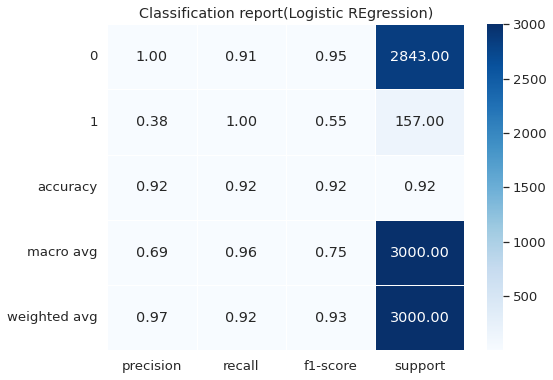

In [ ]:
# Predict on the original test set
y_pred = lr.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the classification report using seaborn heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(
    data=pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T,
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    fmt=".2f",
)
plt.title("Classification report(Logistic REgression)")
plt.show()


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(x_train_sm,y_train_sm)
rf

RandomForestClassifier()

Apply 5-Fold Cross Validation on Random Forest Classifier


In [ ]:
rf_result = cross_val_score(rf, x_train_sm, y_train_sm, cv=5, scoring='f1')
rf_result.mean()

0.9733876811353548

Random Forest Classifier AUC (0.97)

In [ ]:
# Predict on the original test set
y_pred = rf.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the classification report using seaborn heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(
    data=pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T,
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    fmt=".2f",
)
plt.title("Classification Report (Random Forest Classifier)")
plt.show()


Gradient Boosting Classifier


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc = gbc.fit(x_train_sm,y_train_sm)
gbc

GradientBoostingClassifier()

Apply 5-Fold Cross Validation on Random Forest Classifier


In [ ]:
gbc_result = cross_val_score(gbc, x_train_sm, y_train_sm, cv=5, scoring='f1')
gbc_result.mean()

Gradient Boost Classifier AUC (0.95)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2843
           1       0.38      1.00      0.55       157

    accuracy                           0.92      3000
   macro avg       0.69      0.96      0.75      3000
weighted avg       0.97      0.92      0.93      3000



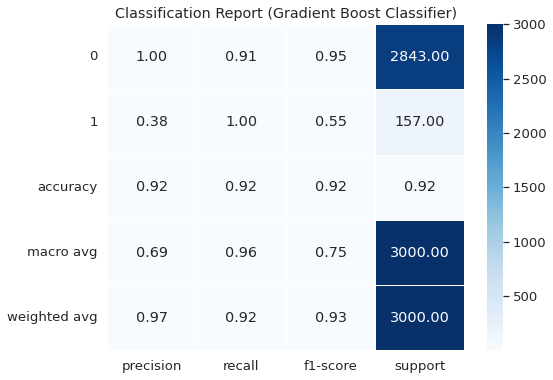

In [ ]:
# Predict on the original test set
y_pred = gbc.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the classification report using seaborn heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(
    data=pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T,
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    fmt=".2f",
)
plt.title("Classification Report (Gradient Boost Classifier)")
plt.show()


Find ROC (Receiver Operating Characteristic) curve /AUC (Area Under Curve)for  each model and ploting the graph

AUC for Logistic Regression: 0.9551720506955288
AUC for Random Forest Classifier: 0.9693593158747263
AUC for Gradient Boosting Classifier: 0.9554039309870482


<Figure size 1080x864 with 0 Axes>

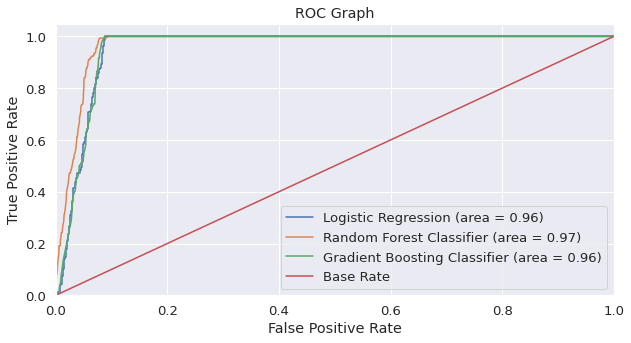

In [ ]:
# Create ROC Graph
from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])


plt.figure(figsize=(15,12))



# Compute AUC for Logistic Regression
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

# Compute AUC for Random Forest Classifier
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

# Compute AUC for Gradient Boosting Classifier
gbc_auc = roc_auc_score(y_test, gbc.predict_proba(X_test)[:,1])

print("AUC for Logistic Regression:", lr_auc)
print("AUC for Random Forest Classifier:", rf_auc)
print("AUC for Gradient Boosting Classifier:", gbc_auc)

plt.figure(figsize=(10,5))
# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_auc)

# Plot Decision Tree ROC
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gbc_auc)

# Plot Base Rate ROc

plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show();

In [ ]:

#confusion matrix for each model
from sklearn.metrics import confusion_matrix


In [ ]:

# Confusion Matrix for Logistic Regresion
confusion_matrix(y_test, lr.predict(X_test))

array([[2590,  253],
       [   0,  157]])

In [ ]:
# Confusion Matrix for GBC
confusion_matrix(y_test, gbc.predict(X_test))

array([[2591,  252],
       [   0,  157]])

In [ ]:
# Confusion Matrix for Random Forest
confusion_matrix(y_test, rf.predict(X_test))

array([[2714,  129],
       [  42,  115]])

Recall or Precision?
It depends on how much cost/weight you want on your two types of errors: (1) False Positives or (2) False Negatives

We want our machine learn model to capture as much of the minority class as possible (turnover group). Our objective is to catch ALL of the highly probable turnover employee at the risk of flagging some low-risk non-turnover employee.

Consider employee turnover domain where an employee is given treatment by Human Resources because they think the employee will leave the company within a month, but the employee actually does not. This is a false positive. This mistake could be expensive, inconvenient, and time consuming for both the Human Resources and employee, but is a good investment for relational growth.

Compare this with the opposite error, where Human Resources does not give treatment/incentives to the employees and they do leave. This is a false negative. This type of error is more detrimental because the company lost an employee, which could lead to great setbacks and more money to rehire.

Depending on these errors, different costs are weighed based on the type of employee being treated. For example, if it’s a high-salary employee then would we need a costlier form of treatment? What if it’s a low-salary employee? The cost for each error is different and should be weighed accordingly.

Optimize Recall When:

You want to limit false negatives
You will get more False Positives
FN > FP
Example: Predicting Cancer Patients or Credit Card Fraud
Optimize Precision When:

You want to limit false positives
FP > FN
Example: Spam VS Not Spam

Using the best model, predict the probability of employee turnover in the test data

Retention Plan

In [ ]:
# Ranking turnover probability for employees
rf.predict_proba(X_test)[170:185]

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.71, 0.29],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [ ]:
list(rf.predict_proba(X_test)[170:185, 1])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.29, 0.01, 0.0, 0.01, 0.0, 0.0]

In [ ]:
list(rf.predict_proba(X_test)[170:185, 1] > 0.2)

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False]

7.2.	Based on the below probability score range, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
■	Safe Zone (Green) (Score < 20%)
■	Low Risk Zone (Yellow) (20% < Score < 60%)
■	Medium Risk Zone (Orange) (60% < Score < 90%)
■	High Risk Zone (Red) (Score > 90%).


Since this model is being used for people, we should refrain from soley relying on the output of our model. Instead, we can use it's probability output and design our own system to treat each employee accordingly.

Safe Zone (Green) – Employees within this zone are considered safe.
Low Risk Zone (Yellow) – Employees within this zone are too be taken into consideration of potential turnover. This is more of a long-term track.
Medium Risk Zone (Orange) – Employees within this zone are at risk of turnover. Action should be taken and monitored accordingly.
High Risk Zone (Red) – Employees within this zone are considered to have the highest chance of turnover. Action should be taken immediately.
Safe Zone (Green) (Score < 20%)
- No Action required

Low Risk Zone (Yellow)(Score < 20%)
- Action to be taken on long term basis
- Apply group interventions
- HR to track demographic data for these individuals to see if the risk profiles are changing or if the equation needs to be altered

Medium Risk Zone (Orange) (60% < Score < 90%)
- Action to be taken on medium term basis
- HR to keep a close watch on the behavioral status to change from "Medium" to "High" risk. HR to analyze demographic data to identify high risk supervisors and point them to the BU heads
- Apply group interventions

High Risk Zone (Red)  
- Action to be taken on immediate basis
- HR to send list to the concerned managers for immediate acion
- HR to validate the risks for consistency with the identified clusters
- Managers to have one - to one conversation with the identified employee

In [ ]:

#Retention strategies of the employeees based on the probabilit score
# Example probabilities
probabilities = rf.predict_proba(X_test)[:, 1]

# Define zones based on probability thresholds
safe_zone_threshold = 0.2
low_risk_zone_threshold = 0.6
medium_risk_zone_threshold = 0.9

# Categorize employees into zones
employee_zones = []
for prob in probabilities:
    if prob < safe_zone_threshold:
        employee_zones.append("Safe Zone (Green)")
    elif safe_zone_threshold < prob < low_risk_zone_threshold:
        employee_zones.append("Low Risk Zone (Yellow)")
    elif low_risk_zone_threshold < prob < medium_risk_zone_threshold:
        employee_zones.append("Medium Risk Zone (Orange)")
    else:
        employee_zones.append("High Risk Zone (Red)")

# Print the zone for each employee and suggest retention strategies
for i, zone in enumerate(employee_zones):
    print(f"Employee {i+1} is in the {zone}.")

# Retention strategies for each zone
safe_zone_strategy = "Employees in the Safe Zone are performing well and are likely to stay. However, it's still important to recognize their contributions and provide opportunities for growth and development to maintain their satisfaction."
low_risk_zone_strategy = "Employees in the Low Risk Zone may need some attention to ensure their continued engagement and satisfaction. Providing regular feedback, recognition, and opportunities for advancement can help maintain their motivation and commitment."
medium_risk_zone_strategy = "Employees in the Medium Risk Zone are showing signs of potential turnover. It's essential to engage with them proactively, address any concerns or dissatisfaction, and provide support and resources to improve their job satisfaction and loyalty."
high_risk_zone_strategy = "Employees in the High Risk Zone are at the greatest risk of turnover. Immediate action is needed to understand the reasons behind their potential dissatisfaction and take steps to address them. Offering incentives, additional support, or re-evaluating their roles and responsibilities may be necessary to retain these employees."

# Print retention strategies for each zone
print("\nRetention Strategies:")
print("Safe Zone (Green):", safe_zone_strategy)
print("Low Risk Zone (Yellow):", low_risk_zone_strategy)
print("Medium Risk Zone (Orange):", medium_risk_zone_strategy)
print("High Risk Zone (Red):", high_risk_zone_strategy)


Employee 1 is in the Safe Zone (Green).
Employee 2 is in the Safe Zone (Green).
Employee 3 is in the Safe Zone (Green).
Employee 4 is in the Safe Zone (Green).
Employee 5 is in the Safe Zone (Green).
Employee 6 is in the Safe Zone (Green).
Employee 7 is in the Safe Zone (Green).
Employee 8 is in the Safe Zone (Green).
Employee 9 is in the Safe Zone (Green).
Employee 10 is in the Safe Zone (Green).
Employee 11 is in the Safe Zone (Green).
Employee 12 is in the Safe Zone (Green).
Employee 13 is in the Safe Zone (Green).
Employee 14 is in the Safe Zone (Green).
Employee 15 is in the Safe Zone (Green).
Employee 16 is in the Safe Zone (Green).
Employee 17 is in the Medium Risk Zone (Orange).
Employee 18 is in the Safe Zone (Green).
Employee 19 is in the Safe Zone (Green).
Employee 20 is in the Safe Zone (Green).
Employee 21 is in the Safe Zone (Green).
Employee 22 is in the Safe Zone (Green).
Employee 23 is in the Low Risk Zone (Yellow).
Employee 24 is in the Medium Risk Zone (Orange).
Empl